In [1]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [2]:
url = "https://developer.uspto.gov/ptab-api/proceedings?proceedingFilingFromDate=2019-11-01&proceedingFilingToDate=2019-11-30&recordTotalQuantity=200&sortOrderCategory=proceedingFilingDate"

In [3]:
ptab = requests.get(url).json()
ptab = pd.DataFrame(ptab['results'])

In [4]:
ptab=ptab.iloc[:, 0:16]

In [5]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
#df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [6]:
df = ptab[['proceedingNumber', 'respondentPatentNumber', 'petitionerPartyName', 'petitionerCounselName', 'respondentPatentOwnerName', 'respondentPartyName', 'respondentCounselName','respondentTechnologyCenterNumber', 'respondentGroupArtUnitNumber',
       'proceedingFilingDate']]

In [7]:
df.index+=1
df.index

RangeIndex(start=1, stop=83, step=1)

In [8]:
#df.reset_index(drop=True).style.format({'respondentPatentNumber':make_clickable})
df.style.format({'respondentPatentNumber':make_clickable})

,proceedingNumber,respondentPatentNumber,petitionerPartyName,petitionerCounselName,respondentPatentOwnerName,respondentPartyName,respondentCounselName,respondentTechnologyCenterNumber,respondentGroupArtUnitNumber,proceedingFilingDate
1,IPR2020-00101,8495359,Microsoft Corporation,Todd Siegel,"Etchegoyen, Craig Stephen",nan,nan,2400,2438,11-01-2019
2,CBM2020-00001,6996538,Life Technologies Corporation,Michael Kiklis,"Lucas, Michael T.","Unisone Strategic IP, Inc.",Gregory Sargenti,3600,3627,11-01-2019
3,CBM2020-00005,6996538,Life Technologies Corporation,Michael Kiklis,"Lucas, Michael T.","Unisone Strategic IP, Inc.",Gregory Sargenti,3600,3627,11-01-2019
4,IPR2020-00080,10264032,nan,Erika Arner,"Hammond, Daniel D.",nan,nan,2600,2642,11-04-2019
5,2020000583,nan,nan,nan,nan,Young Min Kim et al.,nan,1700,1734,11-04-2019
6,IPR2020-00124,10130096,"BORAGEN, INC.",Chen Chen,Bobbio et al,nan,nan,1600,1616,11-05-2019
7,IPR2020-00102,6498541,Microsoft Corporation,Andrew Mason,Den Besten et al,nan,nan,2800,2817,11-05-2019
8,IPR2020-00103,6498541,Microsoft Corporation,Andrew Mason,Den Besten et al,nan,nan,2800,2817,11-05-2019
9,IPR2020-00123,10270535,"Cisco Systems, Inc.",Theodore Foster,EHRLICHMAN et al,Ramot at Tel Aviv University Ltd.,Lauren Robinson,2800,2845,11-05-2019
10,IPR2020-00122,10033465,"Cisco Systems, Inc.",Theodore Foster,EHRLICHMAN et al,Ramot at Tel Aviv University Ltd.,Lauren Robinson,2800,2845,11-05-2019


Text(0, 0.5, 'Count of filings')

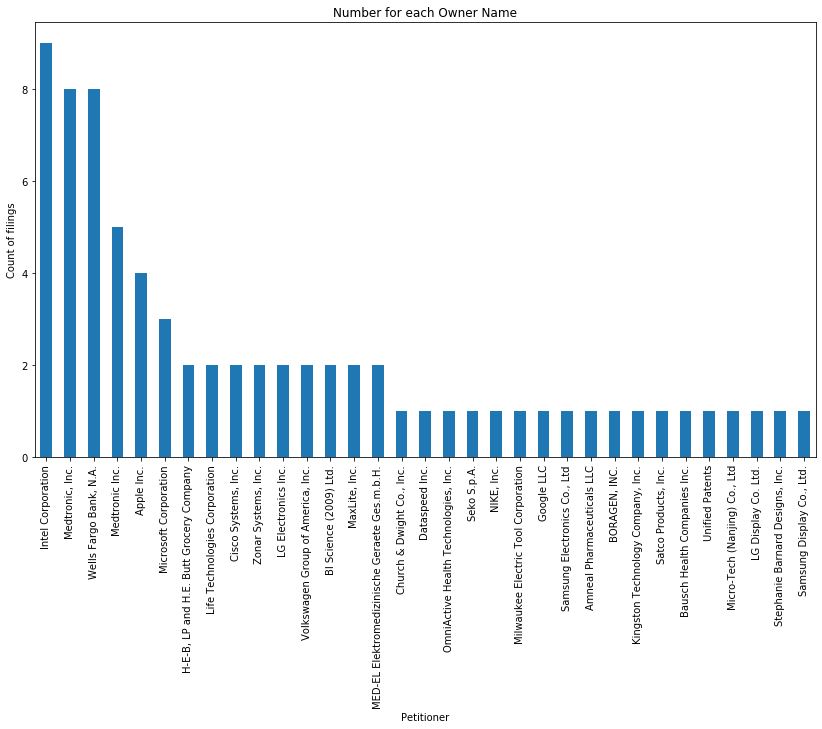

In [9]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")